# Estimate of NFW Slope
This notebook contains a simple calculation of an estimate of the Navarro-Frank-White mass distribution. We are looking for the relation between dark matter density and radius at radii on the order of 100 kpc. 

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

The data below is extracted from Cautun et al. (2020). Since this is just an estimate, I took roughly 10 points from their figure 7, from a little less than 100 kpc to a little under 300 kpc. Their figure gives the relation between (r<sup>2</sup> rho) vs. r, so in order to get the slope of rho vs. r, we will have to adjust later.

In [16]:
df = pd.read_csv('~/Desktop/Intra-Cluster-Light/Data/NFW_slope_estimate.csv',header = None, names = ['r', 'r_squared_rho'])
df = df.rename(columns = {'0' : 'r','1' : r'$r^2 \rho^{DM}$'})

df2 = pd.read_csv('~/Desktop/Intra-Cluster-Light/Data/nfw_100_to_300.csv',header = None, names = ['r', 'r_squared_rho'])
df2 = df2.rename(columns = {'0' : 'r','1' : r'$r^2 \rho^{DM}$'})
print(df)
print(df2)

            r  r_squared_rho
0   67.806345   4.390702e+08
1   80.445345   4.039567e+08
2   91.876104   3.716514e+08
3  108.992285   3.348782e+08
4  131.781185   3.017436e+08
5  150.506434   2.776124e+08
6  189.002195   2.399333e+08
7  232.890388   2.117346e+08
8  276.277013   1.907845e+08
             r  r_squared_rho
0   100.041585   3.437503e+08
1   111.094501   3.233629e+08
2   106.533392   3.308654e+08
3   119.134415   3.112350e+08
4   125.983299   3.018610e+08
5   133.225917   2.927693e+08
6   140.884903   2.839515e+08
7   148.984195   2.753992e+08
8   159.762498   2.630635e+08
9   168.943136   2.532088e+08
10  181.169558   2.437121e+08
11  191.584763   2.363718e+08
12  202.598724   2.292526e+08
13  211.267883   2.223580e+08
14  220.313082   2.173160e+08
15  232.973216   2.091751e+08
16  246.366546   2.028750e+08
17  260.529842   1.967647e+08
18  271.684136   1.923030e+08
19  285.305779   1.879381e+08
20  295.439024   1.822903e+08


In [43]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

def slope_rsquared(x,a):
    return power_law(x,a,0)

def slope_r_twopointfive(x,a):
    return power_law(x,a,-0.5)

def slope_r_twopointsix(x,a):
    return power_law(x,a,-0.6)

def slope_r_twopointfour(x,a):
    return power_law(x,a,-0.4)

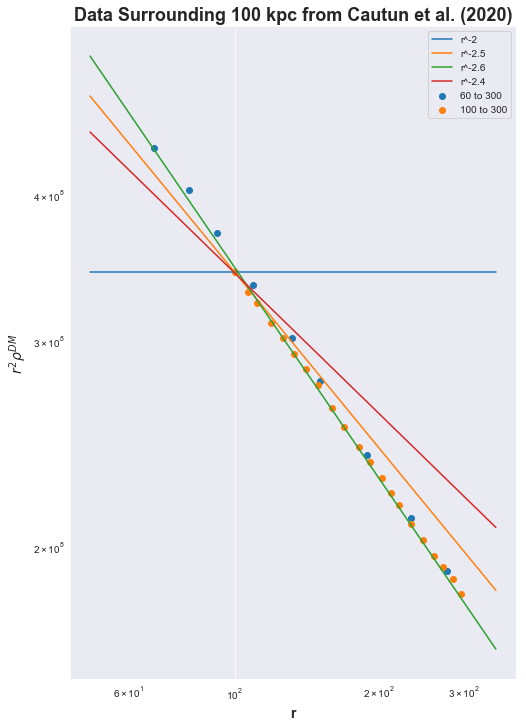

In [55]:
from scipy.optimize import curve_fit
import seaborn as sns

sns.set_style('darkgrid')

xs = np.linspace(start = 50,stop = 350,num = 100)

#r squared
ar = 3.438e08
yr2 = slope_rsquared(xs,ar)

#r^-2.5
yr25 = slope_r_twopointfive(xs,ar*10)

#r^-2.6
yr26 = slope_r_twopointsix(xs,ar*16)

#r^-2.4
yr24 = slope_r_twopointfour(xs,ar*6.3)


fig,ax = plt.subplots(figsize = (8,12))


x = df.r
y = df.r_squared_rho

x2 = df2.r
y2 = df2.r_squared_rho

plt.scatter(x,y, label = '60 to 300')
plt.scatter(x2,y2,label = '100 to 300')

plt.plot(xs,yr2,label = 'r^-2')
plt.plot(xs,yr25, label = 'r^-2.5')
plt.plot(xs,yr26, label = 'r^-2.6')
plt.plot(xs,yr24,label = 'r^-2.4')

ax.set_xscale('log',basex = 10)
ax.set_yscale('log',basey = 10)

ax.set_ylabel(r'$r^2 \rho^{DM}$',fontsize = 14,fontweight = 'bold')
ax.set_xlabel('r',fontsize = 14, fontweight ='bold')
ax.set_title('Data Surrounding 100 kpc from Cautun et al. (2020)',fontsize = 18,fontweight = 'bold')

#xticks = [60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280]
#ax.set_xticks(xticks)
#ax.set_xticklabels([str(tick) for tick in xticks],rotation = 90,fontsize = 10)

#yticks = range(100000000,500000000,100000000)
#ax.set_yticks(yticks)
#ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

plt.legend()
plt.show()

* This following calculation will give us the best-fit parameters (and covariances) of the slopes above. We are only concerned with the exponent in the power law, which is stored as the second parameter in the output 'pars'

In [18]:
pars, cov = curve_fit(f=power_law, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))

pars2, cov2 = curve_fit(f=power_law, xdata=x2, ydata=y2, p0=[0, 0], bounds=(-np.inf, np.inf))

print(pars) # parameters. First is a, second is b (y = ax^b)
print()
#print(cov) #covariances

print(pars2)
print()
# print(cov2)

[ 5.42376420e+09 -5.93753053e-01]

[ 5.05942256e+09 -5.83286658e-01]



* This should give us the slope of the 'line' above.

In [19]:
slope_rhoRsquared_v_r = pars[1]
print('Slope (60 to 300)= {:.2f}'.format(slope_rhoRsquared_v_r))

slope2_rhoRsquared_v_r = pars2[1]
print('Slope (100 to 300)= {:.2f}'.format(slope2_rhoRsquared_v_r))

Slope (60 to 300)= -0.59
Slope (100 to 300)= -0.58


* Now, we need to adjust for the fact that our graph is r^2 rho vs r.
* To do so, we subtract 2 from our 'slope' (since we are effectively dividing all y values by r^2)

In [22]:
slope_rho_v_r = slope_rhoRsquared_v_r - 2
print('(60 kpc to 300 kpc) y = a * x^({:.2f})'.format(slope_rho_v_r))

slope2_rho_v_r = slope2_rhoRsquared_v_r - 2
print('(100 kpc to 300 kpc) y = a * x^({:.2f})'.format(slope2_rho_v_r))

(60 kpc to 300 kpc) y = a * x^(-2.59)
(100 kpc to 300 kpc) y = a * x^(-2.58)


**Thus, the best fit NFW profile for this range is $\rho$ $\alpha$ r<sup>-2.59</sup>. I think, for our paper, we'll use -2.6.**